In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Dataset

In [3]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [4]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [17]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


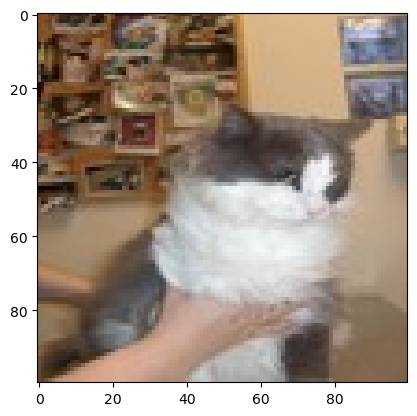

In [6]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])

# Model

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    
])

In [8]:
model = Sequential()
   
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 65)

Epoch 1/5
31/31 [==============================] - 7s 197ms/step - loss: 0.7250 - accuracy: 0.5090
Epoch 2/5
31/31 [==============================] - 6s 190ms/step - loss: 0.6866 - accuracy: 0.5505
Epoch 3/5
31/31 [==============================] - 6s 191ms/step - loss: 0.6309 - accuracy: 0.6605
Epoch 4/5
31/31 [==============================] - 6s 193ms/step - loss: 0.5461 - accuracy: 0.7210
Epoch 5/5
31/31 [==============================] - 6s 193ms/step - loss: 0.4829 - accuracy: 0.7690


In [11]:
model.evaluate(X_test, Y_test)


13/13 [==============================] - 1s 28ms/step - loss: 0.6524 - accuracy: 0.6675


[0.6524214744567871, 0.6675000190734863]

# Dự Đoán

1/1 [==============================] - 0s 18ms/step
Đây là một con :  Mèo


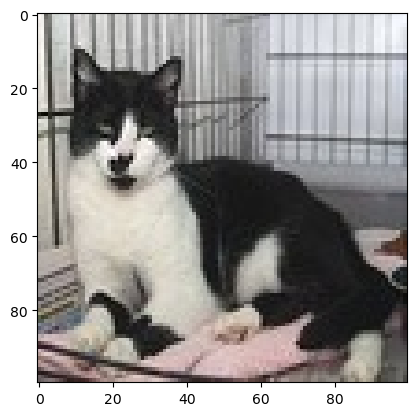

In [48]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if (y_pred == 0):
        pred = 'Chó'
else:
        pred = 'Mèo'
        
print('Đây là một con : ',pred)